<a href="https://colab.research.google.com/github/Tej79/Credit_Card_Fraud_Detection/blob/master/Credit_Card_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [ ]:
!nvidia-smi

Sun Jan 12 00:27:19 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              29W /  70W |    107MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

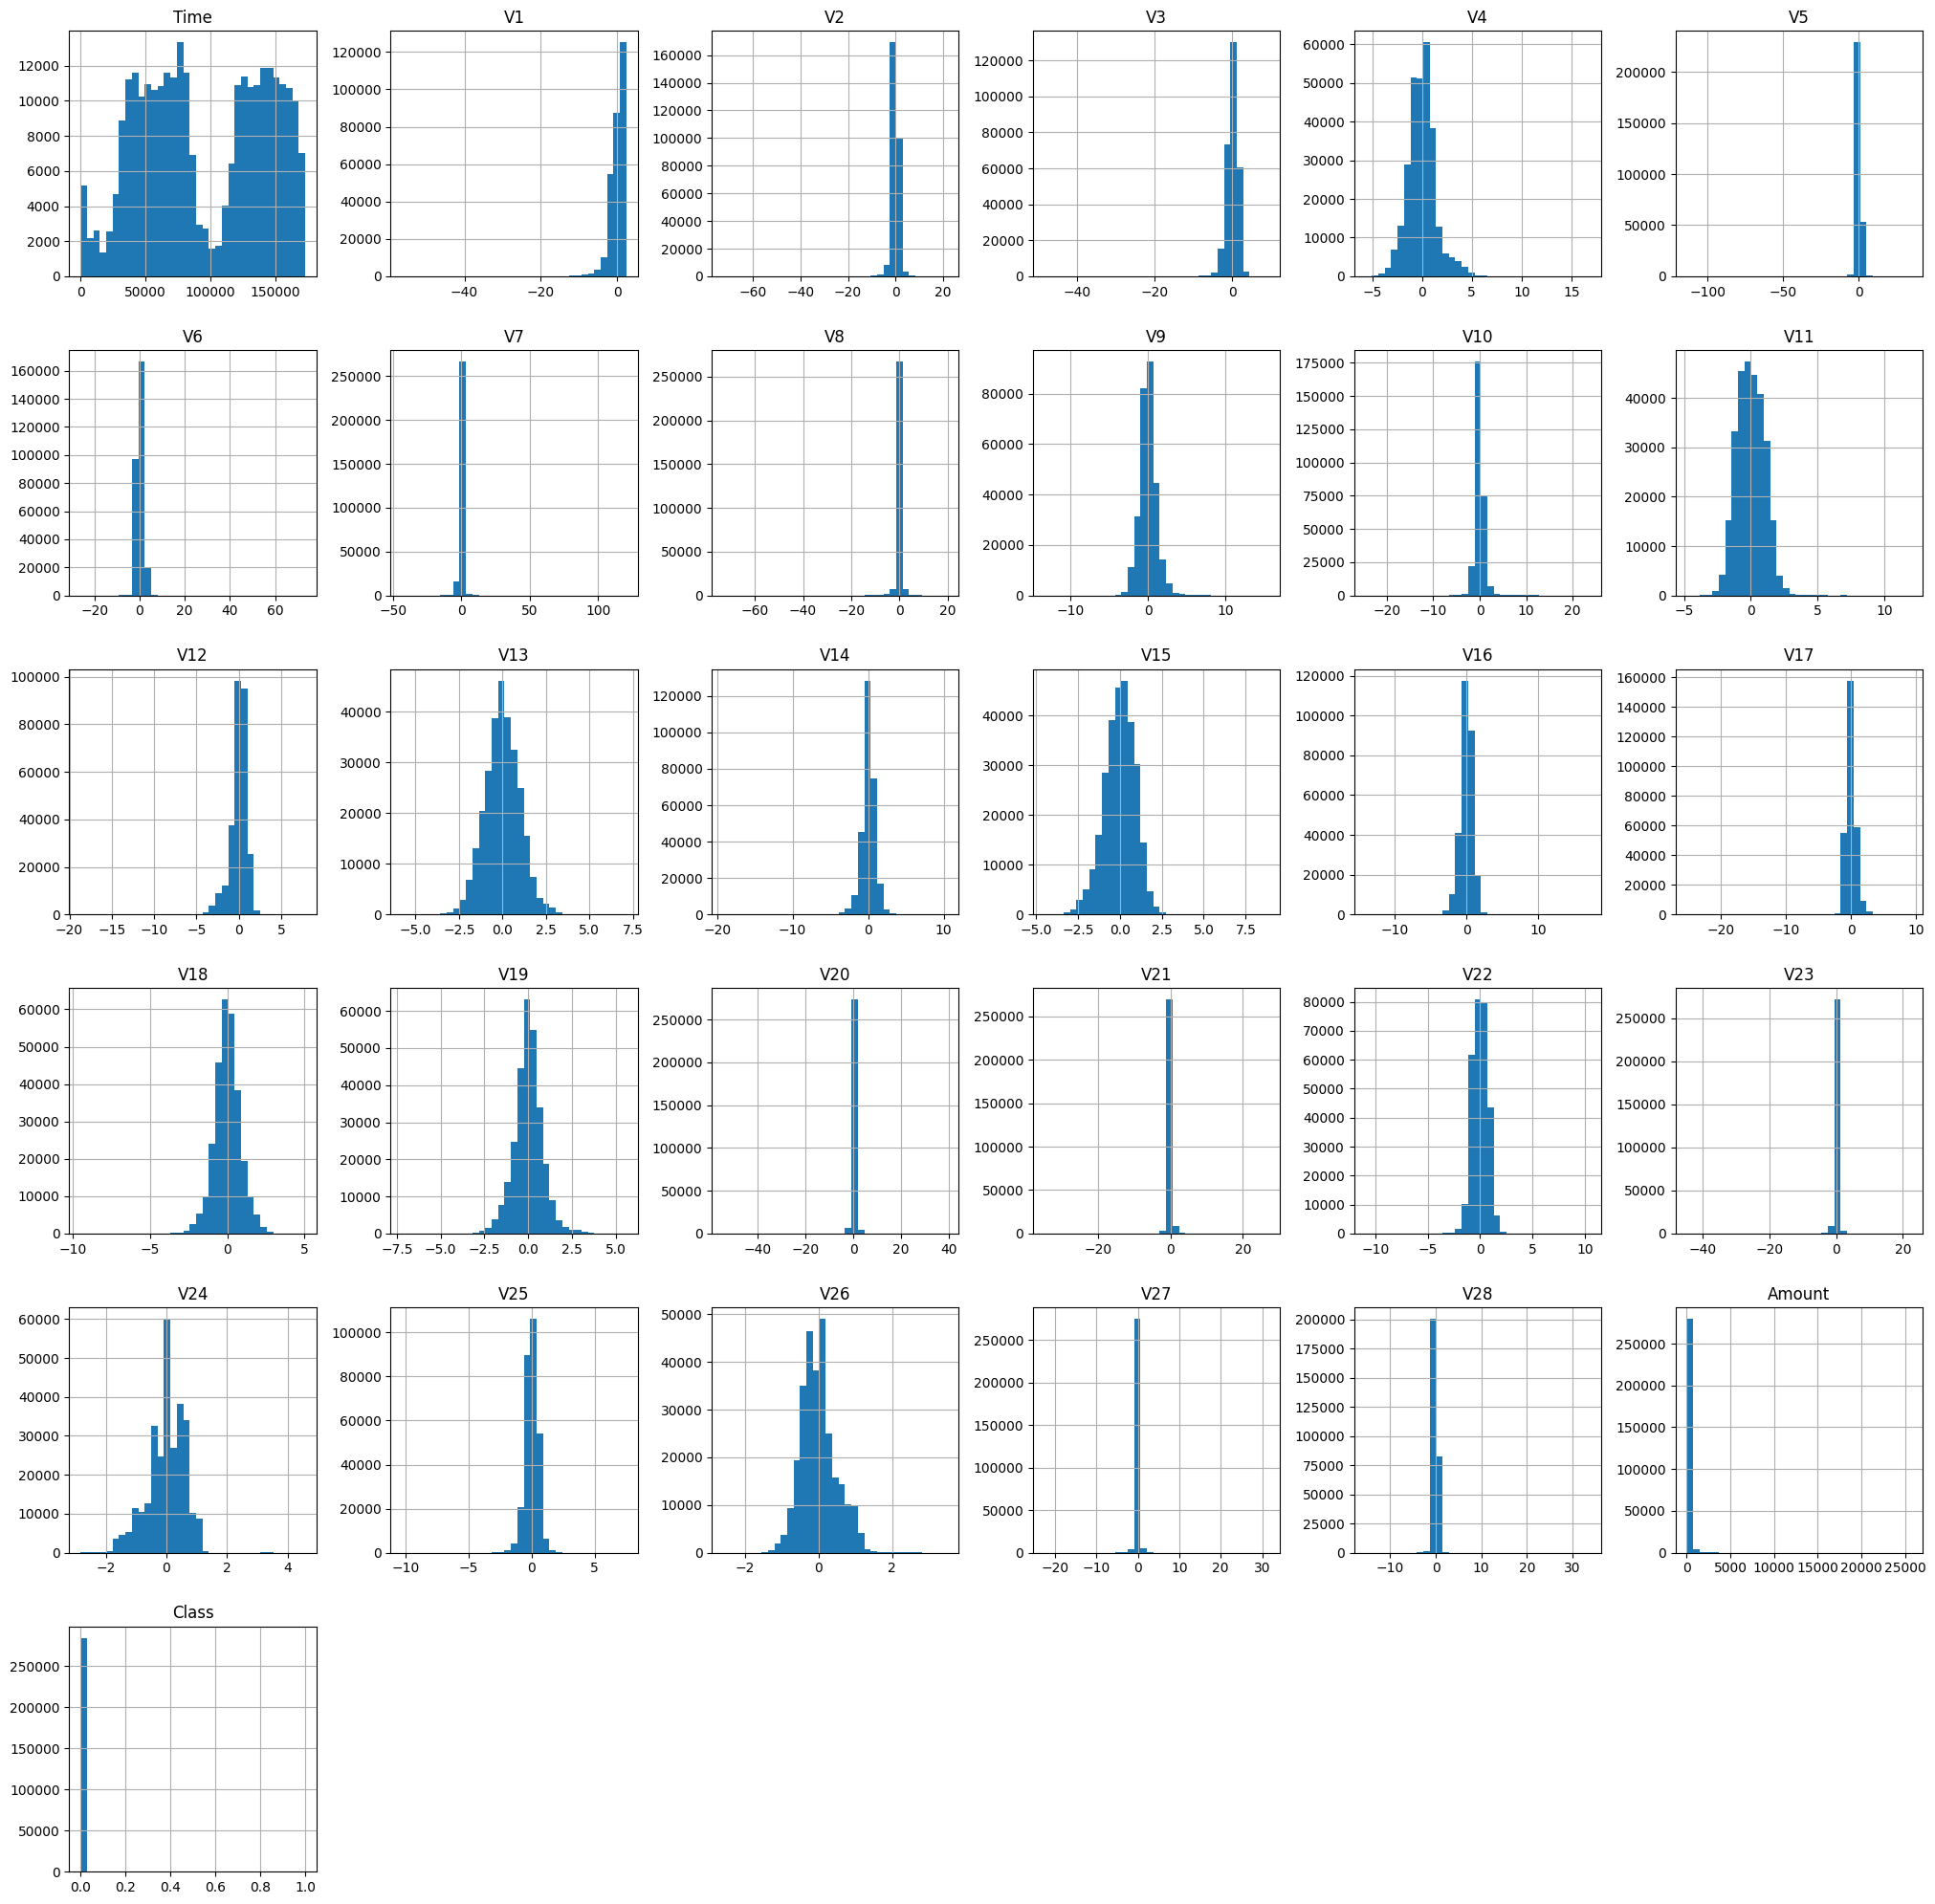

In [ ]:
df.hist(bins=35, figsize=(25,25))

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Preparing Data for Input

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


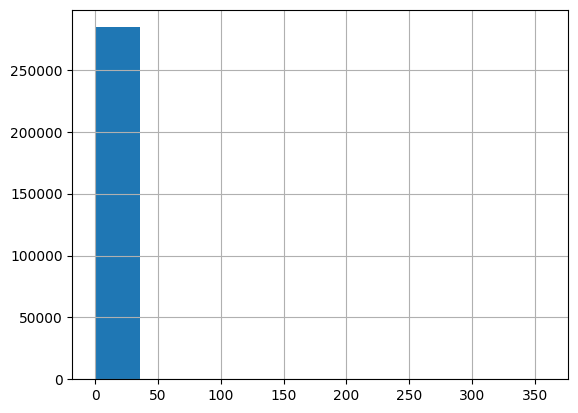

In [ ]:
from sklearn.preprocessing import RobustScaler
df_copy = df.copy()
# reducing effect of outliers
scaler = RobustScaler()
df_copy["Amount"] = scaler.fit_transform(df_copy["Amount"].to_numpy().reshape(-1, 1))
# normalizing time values between 0 and 1
time = df_copy["Time"]
df_copy["Time"] = (time - time.min())/(time.max() - time.min())
df_copy["Amount"].hist()
df_copy.describe()
df_copy

In [ ]:
# shuffling values in dataframe
df_shuffle = df.sample(frac=1, random_state=1)
df_shuffle

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26,0
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32,0
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58,0
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80,0


In [ ]:
# dividing data into two for training and validation
train, validate = df_shuffle[:int(len(df_shuffle)*0.8)], df_shuffle[int(len(df_shuffle)*0.8):]
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265486,161906.0,2.158550,-0.919931,-0.901455,-1.104434,-0.498188,0.056283,-0.924423,0.008515,-0.369770,...,0.248345,0.747434,0.130872,0.329433,-0.093102,-0.207438,-0.003007,-0.054035,19.20,0
266171,162218.0,-1.437810,0.198053,0.176389,-3.070344,-1.156125,-0.299827,-1.023645,0.871608,-2.225085,...,0.036402,0.164698,-0.082443,0.735386,-0.164048,-0.361517,-0.270025,0.062326,14.00,0
49037,43885.0,-1.705280,-1.128554,0.607383,-0.877637,-1.758511,0.383241,3.031279,-0.199725,-0.479356,...,0.500892,0.210662,1.315839,0.052695,0.272085,0.955016,-0.255103,0.117569,670.39,0
242565,151546.0,-0.964271,-0.043073,1.297015,-3.133226,-1.004501,-0.302242,-0.637247,0.574619,-2.327870,...,-0.131273,-0.061240,-0.378254,-0.375611,0.674617,-0.114479,0.149058,0.029520,6.00,0


In [ ]:
validate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168403,119212.0,-1.881138,-0.742356,1.069960,-1.237348,-1.475603,0.199137,1.863285,-0.474233,0.410131,...,0.028188,0.670432,-0.225319,0.065101,0.472255,0.920281,0.084247,0.029448,467.60,0
47395,43197.0,1.225254,0.341818,0.758731,0.735527,-0.647840,-1.273964,0.141774,-0.297850,-0.146805,...,-0.211151,-0.561738,0.190821,0.940712,0.181406,0.058212,-0.021477,0.026470,0.89,0
133247,80306.0,1.187975,-0.875551,0.539152,0.291263,-0.730959,1.031249,-1.031117,0.295960,-0.074414,...,-0.263928,-0.278419,-0.211370,-1.371027,0.462111,-0.145520,0.090542,0.034679,82.74,0
113773,73199.0,-1.280435,1.660030,-0.324967,-0.547382,-0.825442,0.542511,-2.554683,-8.049215,-1.126324,...,-4.120821,0.102331,0.214686,0.395000,0.132763,0.575246,-0.004179,0.268442,122.97,0
115876,74053.0,1.256411,-0.732726,1.090302,-0.584773,-1.454127,-0.428225,-1.012650,0.005876,-0.530527,...,0.454913,1.274395,-0.064847,0.463530,0.323707,-0.044820,0.053882,0.031899,39.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26,0
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32,0
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58,0
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80,0


In [ ]:
train["Class"].value_counts(), validate["Class"].value_counts()

(Class
 0    227447
 1       398
 Name: count, dtype: int64,
 Class
 0    56868
 1       94
 Name: count, dtype: int64)

In [ ]:
train_np = train.to_numpy()
validate_np = validate.to_numpy()
train.shape, validate.shape

((227845, 31), (56962, 31))

In [ ]:
# splitting into data and labels
x_train, y_train = train_np[:,:-1], train_np[:,-1]
x_validate, y_validate = validate_np[:,:-1], validate_np[:,-1]
x_train.shape, y_train.shape, x_validate.shape, y_validate.shape

((227845, 30), (227845,), (56962, 30), (56962,))

###Unbalanced Models

In [ ]:
# 1st model candidate
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_validate, y_validate)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9989993328885924

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_validate, lr_model.predict(x_validate), target_names=["Fraud", "NotFraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.69      0.70      0.70        94

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Here, accuracy is not a good measurement to rely on since the data is highly imbalanced. It shows 100% but looking at the precision, recall and f1-score shows that the model is in fact not 100% accurate. This we will depend on the precision, recall and f1-score to judge the model.

In [ ]:
# 2nd model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_model = Sequential()
shallow_model.add(Input((x_train.shape[1],)))
shallow_model.add(Dense(2, activation="relu"))
shallow_model.add(BatchNormalization())
shallow_model.add(Dense(1, activation="sigmoid"))

checkpoint = ModelCheckpoint("shallow_model.keras", save_best_only=True)
shallow_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

shallow_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [ ]:
shallow_model.fit(x_train, y_train, epochs=10, validation_data=(x_validate, y_validate), callbacks=[checkpoint])

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9588 - loss: 0.1690 - val_accuracy: 0.9983 - val_loss: 0.0131
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9982 - loss: 0.0135 - val_accuracy: 0.9983 - val_loss: 0.0130
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9984 - loss: 0.0121 - val_accuracy: 0.9983 - val_loss: 0.0125
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9983 - loss: 0.0125 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9982 - loss: 0.0131 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9983 - loss: 0.0129 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9982 - loss: 0.0131 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9983 - loss: 0

In [ ]:
def model_prediction(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
model_prediction(shallow_model, x_validate)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_validate, model_prediction(shallow_model, x_validate), target_names=["Fraud", "NotFraud"]))
# something wrong with data since its not predicting not frauds

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.00      0.00      0.00        94

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def report(model, x, y):
  print(classification_report(y, model_prediction(model, x), target_names=["Fraud", "NotFraud"]))
report(shallow_model, x_validate, y_validate)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.00      0.00      0.00        94

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report(shallow_model, x_train, y_train)

7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00    227447
    NotFraud       0.00      0.00      0.00       398

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 3rd model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_model.fit(x_train, y_train)
report(rf_model, x_validate, y_validate)

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.83      0.52      0.64        94

    accuracy                           1.00     56962
   macro avg       0.91      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# 4th model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [ ]:
report(gb_model, x_validate, y_validate)

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.71      0.70      0.71        94

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# 5th model
from sklearn.svm import LinearSVC
svc_model = LinearSVC(class_weight="balanced")
svc_model.fit(x_train, y_train)
report(svc_model, x_validate, y_validate)

              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99     56868
    NotFraud       0.08      0.95      0.14        94

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



### Balanced Models

In [ ]:
# balancing the dataset so model learns and recognize important patterns easier
frauds = df_copy.query("Class == 1")
not_frauds = df_copy.query("Class == 0")
not_frauds["Class"].value_counts(), frauds["Class"].value_counts()
df_balanced = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
df_balanced["Class"].value_counts()

,count
Class,
1,492
0,492


In [ ]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.002350,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.307413,1
623,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,1
4920,0.025823,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.045204,1
6108,0.040430,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
6329,0.043515,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26476,0.197289,1.384778,-0.613943,-0.473714,-1.080493,-0.134557,0.127233,-0.322239,-0.005842,-1.099339,...,-0.926508,-2.437317,0.107510,-1.453848,0.010721,0.602221,-0.085445,-0.006771,0.473695,0
232704,0.852308,-0.662865,-0.063548,-0.453997,0.365725,-0.053082,-1.877818,1.369474,-0.415603,0.164133,...,0.319064,1.076870,0.572212,0.805659,-0.418046,-0.197208,0.118548,0.085739,2.110669,0
161997,0.663995,-1.072320,-1.383812,1.110494,-3.057725,0.355135,-0.062749,-0.135126,-0.519193,-1.626258,...,-0.226405,0.265666,-0.437952,0.378339,-0.278275,-0.400838,-0.468408,-0.180677,0.922239,0
176374,0.710316,-0.580157,0.568520,2.000309,-0.551757,0.202593,0.304296,0.763987,-0.039123,0.280374,...,-0.218156,-0.535974,-0.167347,0.548246,0.296848,-0.467760,-0.107231,-0.141449,0.390973,0


In [ ]:
df_balanced = df_balanced.sample(frac=1, random_state=1)
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189959,0.744404,-0.865285,-0.979506,2.587540,-2.781144,-0.887336,-0.579689,-0.976755,0.132058,-1.658263,...,-0.106978,-0.010528,-0.211955,0.021026,0.358237,-0.209483,0.062051,0.074730,-0.195626,0
107637,0.408213,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,11.218193,1
275992,0.965502,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,8.555858,1
120862,0.439760,0.531678,-1.108844,0.276972,0.386453,-1.038906,-0.810526,0.395582,-0.322635,0.068460,...,0.000589,-0.824566,-0.174821,0.479535,-0.094335,0.698329,-0.130716,0.083227,5.094669,0
207960,0.792328,1.878626,0.162765,-0.167433,3.465196,0.197332,1.157212,-0.676783,0.473890,-0.386278,...,-0.217428,-0.785738,0.406279,-0.056071,-0.560484,-0.388620,-0.012717,-0.038421,-0.223713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236229,0.860700,-1.319844,0.290232,-0.223288,-0.351133,2.003048,0.004449,2.111141,-0.155835,-1.277863,...,0.259482,0.301030,-0.388021,-1.449786,1.720770,-0.282374,-0.106111,0.026727,2.379375,0
15810,0.157716,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1.089779,1
1569,0.007107,-0.693097,0.720897,0.487926,1.545283,-0.123343,0.151906,1.821822,-0.176592,-1.514396,...,0.200782,0.193611,0.288196,-0.081502,0.281742,-0.136080,0.050083,0.147487,3.604136,0
107067,0.406674,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,4.137637,1


In [ ]:
df_balanced_np = df_balanced.to_numpy()
df_balanced_np.shape

(984, 31)

In [ ]:
x_train_bal, y_train_bal = df_balanced_np[:int(len(df_balanced_np)*0.8),:-1], df_balanced_np[:int(len(df_balanced_np)*0.8),-1]
x_validate_bal, y_validate_bal = df_balanced_np[int(len(df_balanced_np)*0.8):,:-1], df_balanced_np[int(len(df_balanced_np)*0.8):,-1]
x_train_bal.shape, y_train_bal.shape, x_validate_bal.shape, y_validate_bal.shape

((787, 30), (787,), (197, 30), (197,))

In [ ]:
pd.Series(y_train_bal).value_counts(), pd.Series(y_validate_bal).value_counts()

(1.0    397
 0.0    390
 Name: count, dtype: int64,
 0.0    102
 1.0     95
 Name: count, dtype: int64)

In [ ]:
# 1st balanced model
lr_model_bal = LogisticRegression()
lr_model_bal.fit(x_train_bal, y_train_bal)
report(lr_model, x_validate_bal, y_validate_bal)

              precision    recall  f1-score   support

       Fraud       0.91      0.81      0.86       102
    NotFraud       0.82      0.92      0.87        95

    accuracy                           0.86       197
   macro avg       0.87      0.86      0.86       197
weighted avg       0.87      0.86      0.86       197



In [ ]:
# 2nd balanced model
shallow_model_bal = Sequential([
    Input((x_train_bal.shape[1],)),
    Dense(2, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

checkpoint = ModelCheckpoint("shallow_model_bal.keras", save_best_only=True)
shallow_model_bal.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

shallow_model_bal.fit(x_train_bal, y_train_bal, epochs=70, validation_data=(x_validate_bal, y_validate_bal), callbacks=[checkpoint])

Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8960 - loss: 0.5055 - val_accuracy: 0.8680 - val_loss: 0.4607
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8920 - loss: 0.4896 - val_accuracy: 0.8883 - val_loss: 0.4646
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.4655 - val_accuracy: 0.9086 - val_loss: 0.4596
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8991 - loss: 0.4500 - val_accuracy: 0.9086 - val_loss: 0.4505
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8780 - loss: 0.4402 - val_accuracy: 0.9188 - val_loss: 0.4410
Epoch 6/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8962 - loss: 0.4156 - val_accuracy: 0.9188 - val_loss: 0.4311
Epoch 7/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9144 - loss: 0.3961 - val_accuracy: 0.9239 - val_loss: 0.4209
Epoch 8/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9242 - loss: 0.3789 - val_accuracy: 0.9239 - val_loss

In [ ]:
report(shallow_model_bal, x_validate_bal, y_validate_bal)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
              precision    recall  f1-score   support

       Fraud       0.93      0.98      0.96       102
    NotFraud       0.98      0.93      0.95        95

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [ ]:
# 3rd balanced model
rf_model_bal = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_model_bal.fit(x_train_bal, y_train_bal)
report(rf_model_bal, x_validate_bal, y_validate_bal)

              precision    recall  f1-score   support

       Fraud       0.89      1.00      0.94       102
    NotFraud       1.00      0.86      0.93        95

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [ ]:
# 4th balanced model
gb_model  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gb_model.fit(x_train_bal, y_train_bal)
report(gb_model, x_validate_bal, y_validate_bal)

              precision    recall  f1-score   support

       Fraud       0.93      0.97      0.95       102
    NotFraud       0.97      0.93      0.95        95

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [ ]:
# 5th balanced model
svc_model_bal = LinearSVC(class_weight="balanced")
svc_model_bal.fit(x_train_bal, y_train_bal)
report(svc_model_bal, x_validate_bal, y_validate_bal)

              precision    recall  f1-score   support

       Fraud       0.93      0.98      0.95       102
    NotFraud       0.98      0.92      0.95        95

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### Result and Summary

Logistic Regression

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.69      0.70      0.70        94

    accuracy                           1.00     56962
    macro avg      0.85      0.85      0.85     56962
    weighted avg   1.00      1.00      1.00     56962


Shallow

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00    227447
    NotFraud       0.00      0.00      0.00       398

    accuracy                           1.00    227845
    macro avg      0.50      0.50      0.50    227845
    weighted avg   1.00      1.00      1.00    227845

  Random Forest

               precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.83      0.52      0.64        94

    accuracy                           1.00     56962
    macro avg      0.91      0.76      0.82     56962
    weighted avg   1.00      1.00      1.00     56962

  Gradient Boosting

                precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00     56868
    NotFraud       0.71      0.70      0.71        94

    accuracy                           1.00     56962
    macro avg      0.85      0.85      0.85     56962
    weighted avg   1.00      1.00      1.00     56962

  Linear SVC

                precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99     56868
    NotFraud       0.08      0.95      0.14        94

    accuracy                           0.98     56962
    macro avg      0.54      0.96      0.57     56962
    weighted avg   1.00      0.98      0.99     56962

Logistic Regression Balanced

              precision    recall  f1-score   support

       Fraud       0.91      0.81      0.86       102
    NotFraud       0.82      0.92      0.87        95

    accuracy                           0.86       197
    macro avg      0.87      0.86      0.86       197
    weighted avg   0.87      0.86      0.86       197

  Shallow Sequential Balanced

                precision    recall  f1-score   support

       Fraud       0.93      0.98      0.96       102
    NotFraud       0.98      0.93      0.95        95

    accuracy                           0.95       197
    macro avg      0.96      0.95      0.95       197
    weighted avg   0.96      0.95      0.95       197

  Random Forest Classifier Balanced

                precision    recall  f1-score   support

       Fraud       0.89      1.00      0.94       102
    NotFraud       1.00      0.86      0.93        95

    accuracy                           0.93       197
    macro avg      0.94      0.93      0.93       197
    weighted avg   0.94      0.93      0.93       197

  Gradient Boosting Classifier Balanced

                precision    recall  f1-score   support

       Fraud       0.93      0.97      0.95       102
    NotFraud       0.97      0.93      0.95        95

    accuracy                           0.95       197
    macro avg      0.95      0.95      0.95       197
    weighted avg   0.95      0.95      0.95       197

Linear SVC Balanced

             precision    recall  f1-score   support

       Fraud       0.93      0.98      0.95       102
    NotFraud       0.98      0.92      0.95        95

    accuracy                           0.95       197
    macro avg      0.95      0.95      0.95       197
    weighted avg   0.95      0.95      0.95       197



Thus, judging by the precision, recall and f1-score values, the balanced sequential model appears to be the best at predicting whether a certain credit card transaction is fraudulent or not.